In [1]:
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5,1,'Original Image')

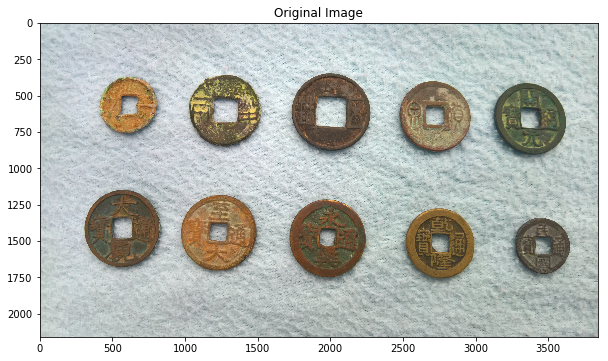

In [3]:
# Image path
imagePath = "CoinsB.jpg"
image = cv2.imread(imagePath)
plt.imshow(image[:,:,::-1])
plt.title("Original Image")

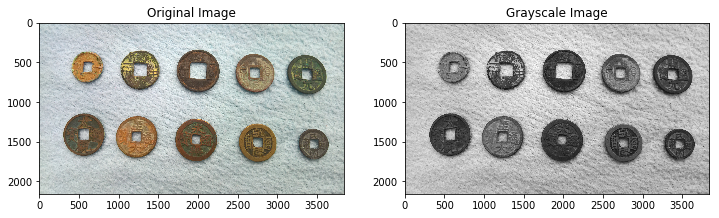

In [4]:
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

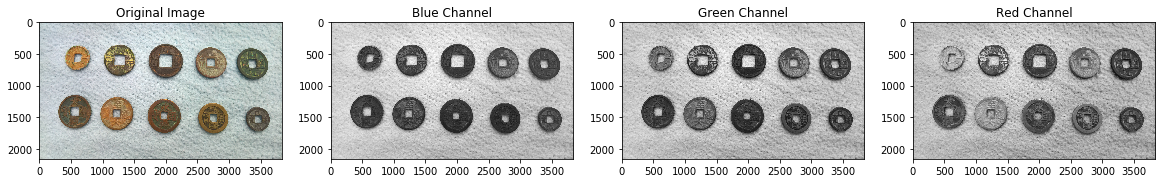

In [5]:
imageB=image[:,:,0]
imageG=image[:,:,1]
imageR=image[:,:,2]
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

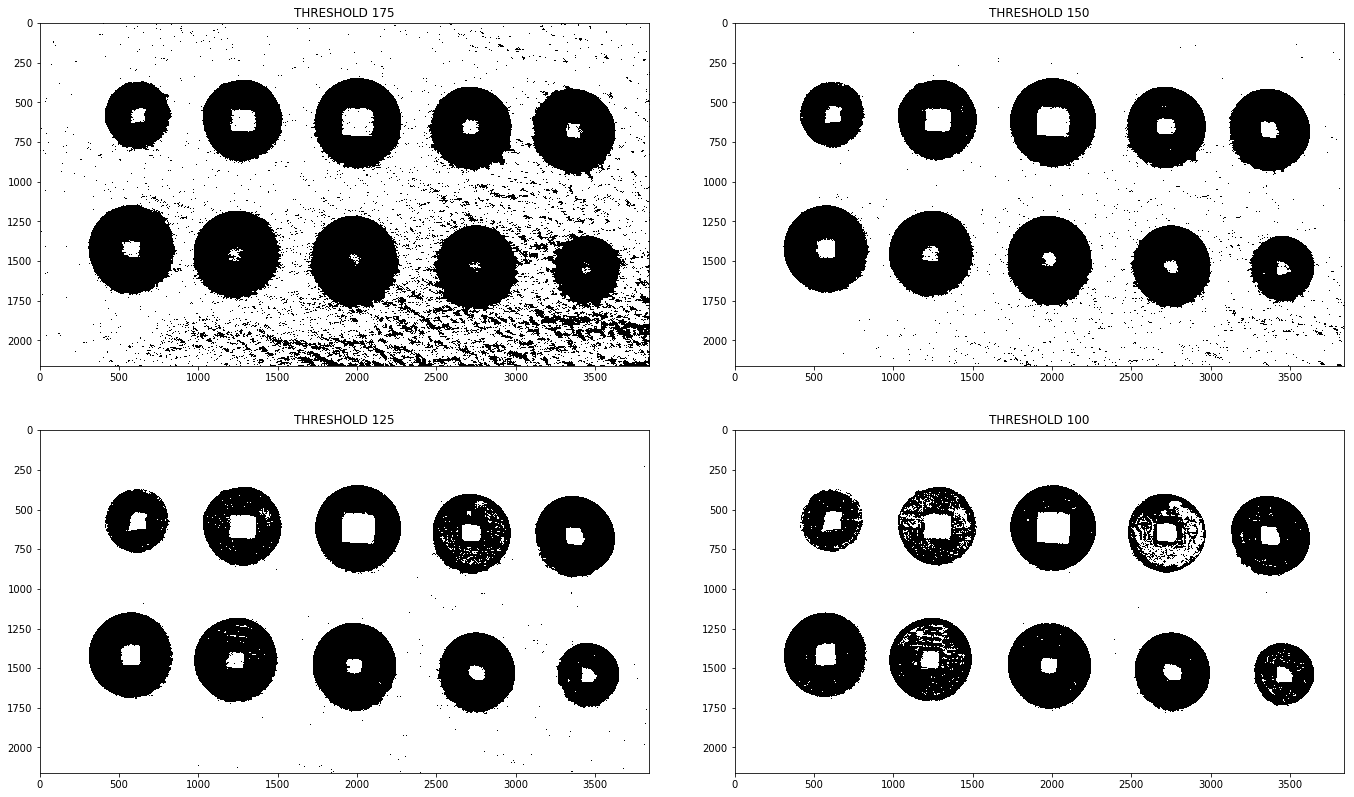

In [18]:
maxVal = 255
_, tImg_0 = cv2.threshold(imageB, 175, maxVal, cv2.THRESH_BINARY)
_, tImg_1 = cv2.threshold(imageB, 150, maxVal, cv2.THRESH_BINARY)
_, tImg_2 = cv2.threshold(imageB, 125, maxVal, cv2.THRESH_BINARY)
_, tImg_3 = cv2.threshold(imageB, 100, maxVal, cv2.THRESH_BINARY)
plt.figure(figsize=(20,20));
plt.subplot(221);plt.title("THRESHOLD 175");plt.imshow(tImg_0);
plt.subplot(222);plt.title("THRESHOLD 150");plt.imshow(tImg_1);
plt.subplot(223);plt.title("THRESHOLD 125");plt.imshow(tImg_2);
plt.subplot(224);plt.title("THRESHOLD 100");plt.imshow(tImg_3);
plt.tight_layout(5,-35);
plt.show();

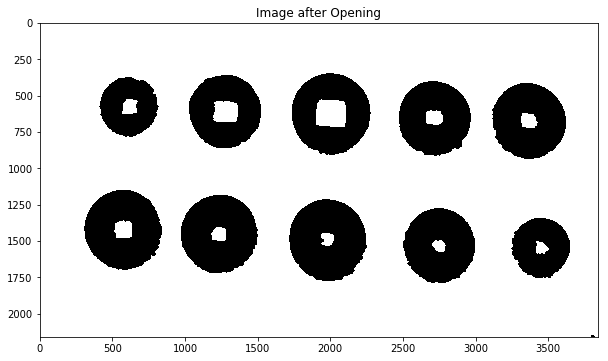

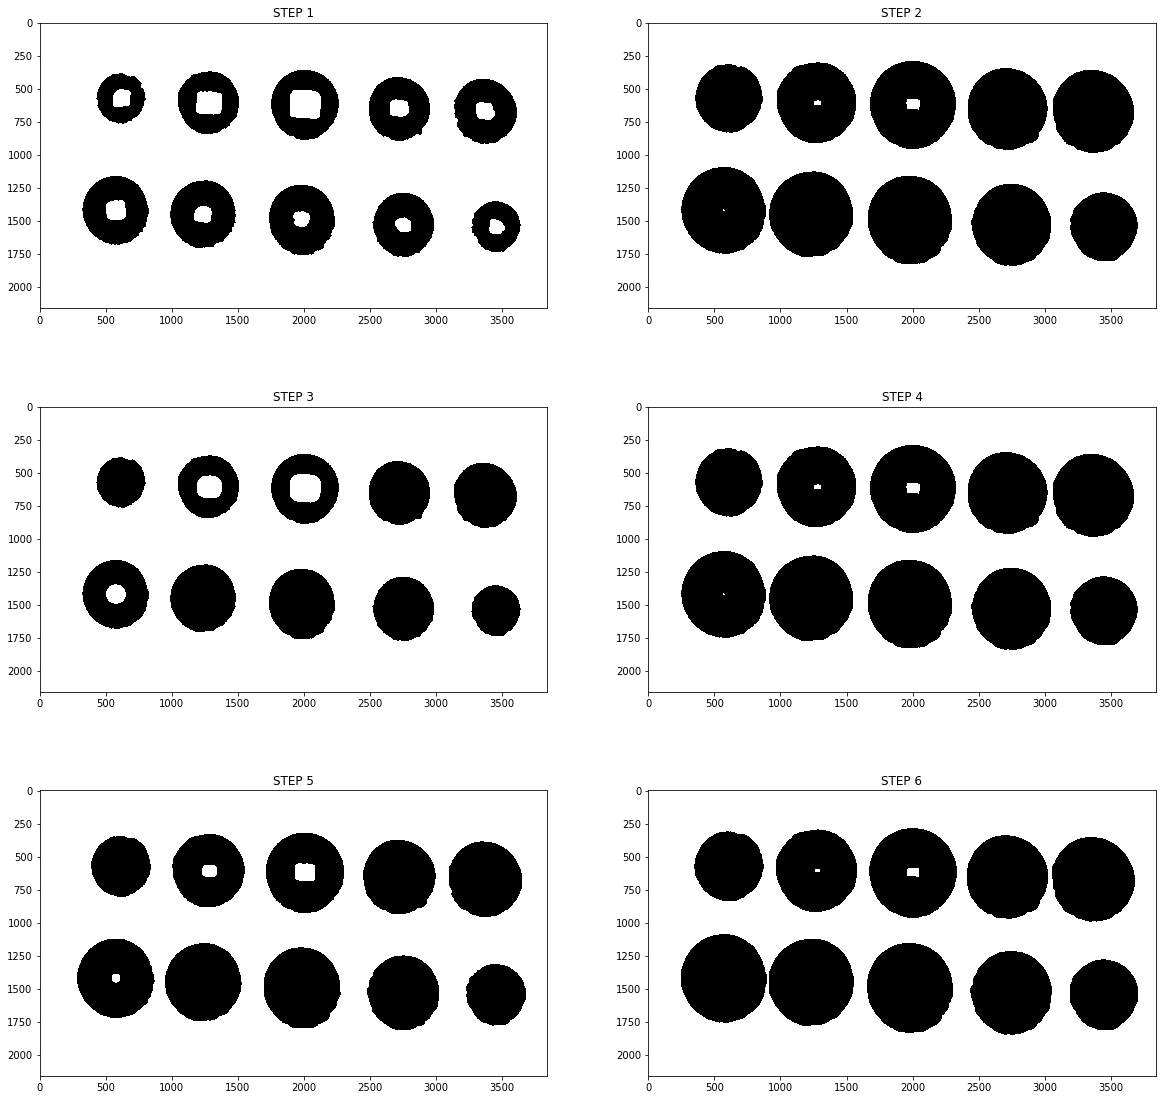

In [19]:
cS1 = 6
cS2 = 10
e1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * cS1 + 1, 2 * cS1 + 1))
e2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * cS2 + 1, 2 * cS2 + 1))


tryClose_1 = cv2.morphologyEx(tImg_1 , cv2.MORPH_CLOSE, e1)
tryClose_2 = cv2.morphologyEx(tImg_1, cv2.MORPH_CLOSE, e2)


#Opening: 

oS1 = 6
oS2 = 10
e1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * oS1 + 1, 2 * oS1 + 1))
e2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * oS2 + 1, 2 * oS2 + 1))


Opening_1 = cv2.morphologyEx(tryClose_2, cv2.MORPH_OPEN, e1)
Opening_2 = cv2.morphologyEx(tryClose_2, cv2.MORPH_OPEN, e2)


plt.imshow(Opening_1)
plt.title("Image after Opening")

temp_binary_image = Opening_1

kS = (11,11)
ker1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kS)
temp1 = cv2.dilate(temp_binary_image, ker1, iterations=3)
kS1 = 7
kS2 = 17
ker1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kS1 + 1, 2 * kS1 + 1))
ker2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * kS2 + 1, 2 * kS2 + 1))

temp2 = cv2.erode(temp1,ker2, iterations=4)
#plt.imshow(temp2)
temp3 = cv2.dilate(temp2,ker2, iterations=4)
#plt.imshow(temp3)
temp4 = cv2.erode(temp3,ker2, iterations=4)
#plt.imshow(temp4)
temp5 = cv2.dilate(temp4, ker1, iterations=4)
#plt.imshow(temp5)
temp6 = cv2.erode(temp5, ker2, iterations=2)
#plt.imshow(temp6)
binaryImg = temp6
plt.figure(figsize=(20,20));
plt.subplot(321);plt.title("STEP 1");plt.imshow(temp1);
plt.subplot(322);plt.title("STEP 2");plt.imshow(temp2);
plt.subplot(323);plt.title("STEP 3");plt.imshow(temp3);
plt.subplot(324);plt.title("STEP 4");plt.imshow(temp4);
plt.subplot(325);plt.title("STEP 5");plt.imshow(temp5);
plt.subplot(326);plt.title("STEP 6");plt.imshow(temp6);

In [23]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# # Filter by Area.
# params.filterByArea = False

# # Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 2

# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.8

# # Filter by Inertia
# params.filterByInertia =True
# params.minInertiaRatio = 0.8

In [24]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [29]:
detections = detector.detect(temp4)
print(detections)

[]
